In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import scipy.stats as stats
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Getting historical data using yahoo finance

df = yf.download('BTC-USD', start = '2015-01-01', end = '2022-05-18')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,29283.103516,42841124537
2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,30101.265625,28579868620
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,31305.113281,25835372065


In [3]:
df['Close_lag1'] = df.Close.shift(periods = -1)
df

,Open,High,Low,Close,Adj Close,Volume,Close_lag1
Date,,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,314.248993
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,315.032013
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,274.473999
...,...,...,...,...,...,...,...
2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,29283.103516,42841124537,30101.265625
2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,30101.265625,28579868620,31305.113281
2022-05-15,30098.585938,31308.191406,29527.740234,31305.113281,31305.113281,25835372065,29862.917969


In [4]:
df = df.drop(['Adj Close'],axis=1)

In [5]:
df = df.iloc[:-1,:]
df

,Open,High,Low,Close,Volume,Close_lag1
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,13942900,314.248993
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,315.032013
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,274.473999
...,...,...,...,...,...,...
2022-05-12,28936.734375,30032.439453,26350.490234,29047.751953,66989173272,29283.103516
2022-05-13,29030.910156,30924.802734,28782.330078,29283.103516,42841124537,30101.265625
2022-05-14,29285.642578,30192.802734,28702.910156,30101.265625,28579868620,31305.113281


In [6]:
# split data into input and output columns
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [7]:
X_train = X.iloc[:-90,:]
X_test =  X.iloc[-90:,:]
y_train = y.iloc[:-90]
y_test = y.iloc[-90:]

### XGBoost Regressor

In [8]:
model = xgb.XGBRegressor(n_estimators = 100, max_depth = 7)
model.fit(X_train,y_train)
yhat = model.predict(X_test)

In [9]:
diff = pd.DataFrame({'true': y_test, 'pred':yhat})
diff

,true,pred
Date,,
2022-02-16,40538.011719,45225.585938
2022-02-17,40030.976562,39130.289062
2022-02-18,40122.156250,40260.632812
2022-02-19,38431.378906,40588.738281
2022-02-20,37075.281250,38453.773438
...,...,...
2022-05-12,29283.103516,31235.105469
2022-05-13,30101.265625,31544.818359
2022-05-14,31305.113281,31230.109375


<AxesSubplot:xlabel='Date'>

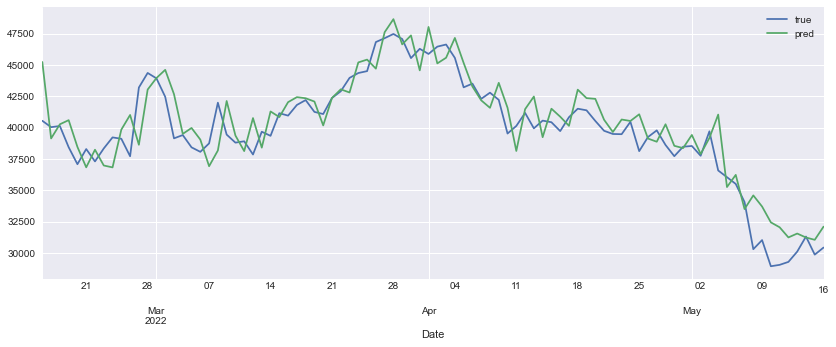

In [10]:
diff.plot(figsize=(14,5))

In [11]:
rmse = np.sqrt(mean_squared_error(diff['true'],diff['pred']))
print(rmse)

1795.8207729228654


In [12]:
mae = mean_absolute_error(diff['true'],diff['pred'])
print(mae)

1413.544162326389


In [13]:
import shap

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


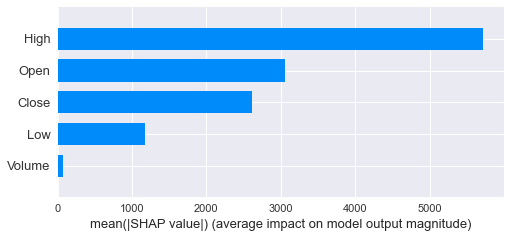

In [15]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

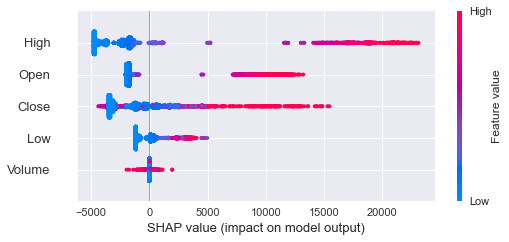

In [16]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

### Random Forest Regressor

In [17]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 7)
rf.fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

In [18]:
diff_rf = pd.DataFrame({'true': y_test, 'pred':yhat_rf})
diff_rf

,true,pred
Date,,
2022-02-16,40538.011719,44778.723730
2022-02-17,40030.976562,39825.579361
2022-02-18,40122.156250,39661.657266
2022-02-19,38431.378906,39828.178872
2022-02-20,37075.281250,38424.558247
...,...,...
2022-05-12,29283.103516,30074.270683
2022-05-13,30101.265625,31562.145734
2022-05-14,31305.113281,31789.953031


<AxesSubplot:xlabel='Date'>

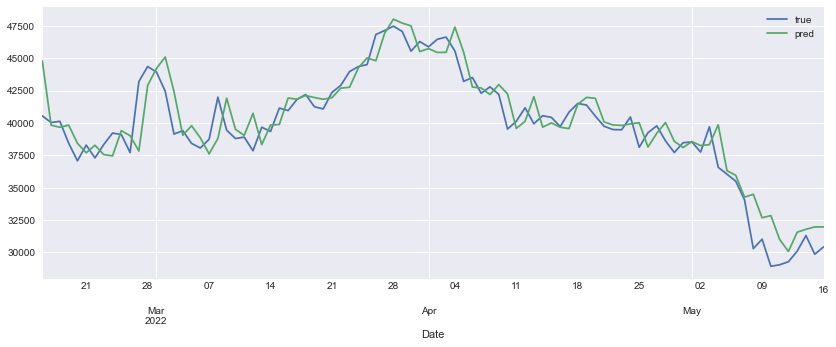

In [19]:
diff_rf.plot(figsize=(14,5))

In [20]:
rmse_rf = np.sqrt(mean_squared_error(diff_rf['true'],diff_rf['pred']))
print(rmse_rf)

1581.149593339626


In [21]:
mae_rf = mean_absolute_error(diff_rf['true'],diff_rf['pred'])
print(mae_rf)

1173.5558777139754


In [22]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

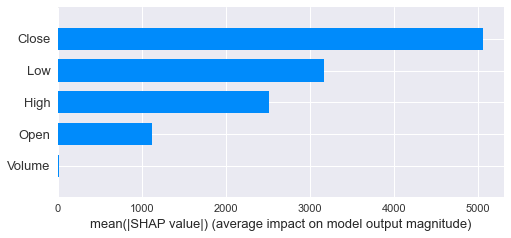

In [23]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

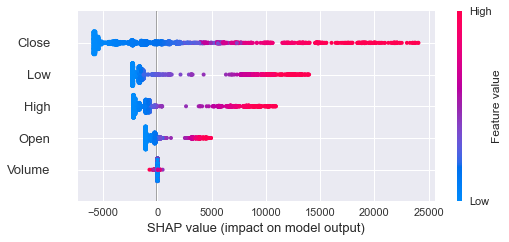

In [24]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)